# Project: Regression Modeling with the Boston Housing Dataset

## Introduction

In this lab, you'll apply the regression analysis and diagnostics techniques covered in this section to the "Boston Housing" dataset. You performed a detailed EDA for this dataset earlier on, and hopefully, you more or less recall how this data is structured! In this lab, you'll use some of the features in this dataset to create a linear model to predict the house price!

## Objectives
You will be able to:
* Perform a linear regression using statsmodels
* Determine if a particular set of data exhibits the assumptions of linear regression
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters
* Use the coefficient of determination to determine model performance
* Interpret the parameters of a simple linear regression model in relation to what they signify for specific data


## Let's get started

### Import necessary libraries and load 'BostonHousing.csv' as a pandas dataframe

In [27]:
# Your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv('BostonHousing.csv')

In [28]:
df


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


The columns in the Boston housing data represent the dependent and independent variables. The dependent variable here is the median house value `MEDV`. The description of the other variables is available on [KAGGLE](https://www.kaggle.com/c/boston-housing). 

### Inspect the columns of the dataset and comment on type of variables present

In [29]:
# Your code here
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [30]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [31]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [32]:
df.zn.unique()


array([ 18. ,   0. ,  12.5,  75. ,  21. ,  90. ,  85. , 100. ,  25. ,
        17.5,  80. ,  28. ,  45. ,  60. ,  95. ,  82.5,  30. ,  22. ,
        20. ,  40. ,  55. ,  52.5,  70. ,  34. ,  33. ,  35. ])

In [33]:
df.chas.unique()

array([0, 1], dtype=int64)

In [34]:
df.rad.unique()

array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

In [35]:
# Record your observations here 
# The dataset mostly contains continuous variables
# zn, chas and rad are the only 3 categorical variables
# there are no null and missing values

### Create histograms for all variables in the dataset and comment on their shape (uniform or not?)

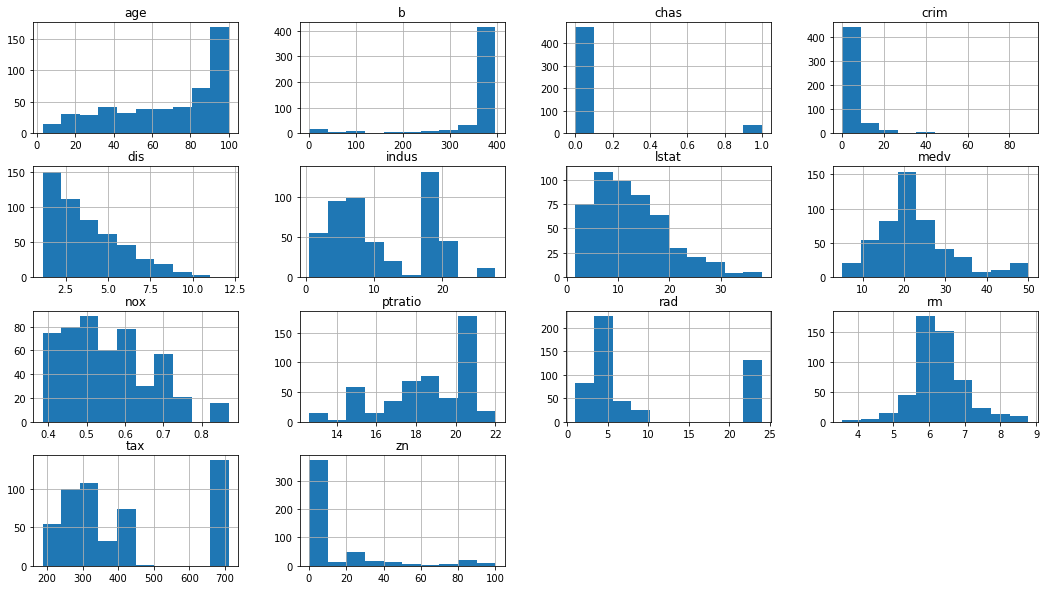

In [36]:
# Your code here 
df.hist(figsize=(18,10) );

In [37]:
# You observations here 
# We see lot of skewness and kurtosis in most variables e.g. dis, age
# Some variables have outliers at extreme tails
# the target (medv) variables looks good with some outliers in the right tail

Based on this, we preselected some features  for you which appear to be more 'normal' than others.
### Create a new dataset with `['crim', 'dis', 'rm', 'zn', 'age', 'medv']`

In [38]:
# Your code here

df=df[['crim', 'dis', 'rm', 'zn', 'age', 'medv']]
df.head()



,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


### Check the linearity assumption for all chosen features with target variable using scatter plots

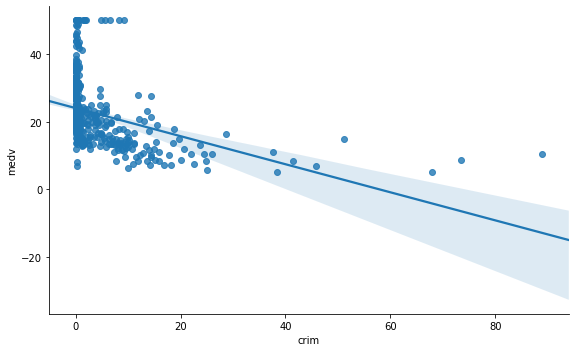

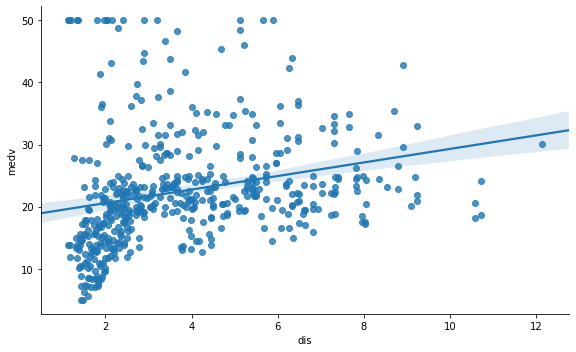

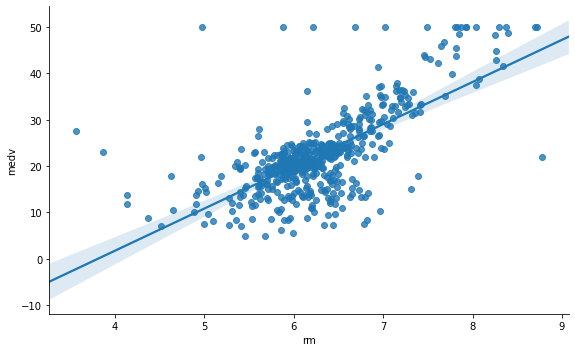

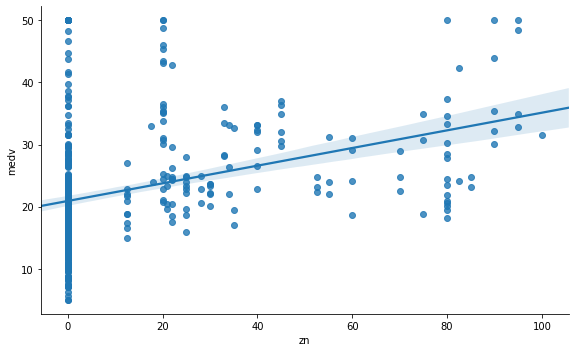

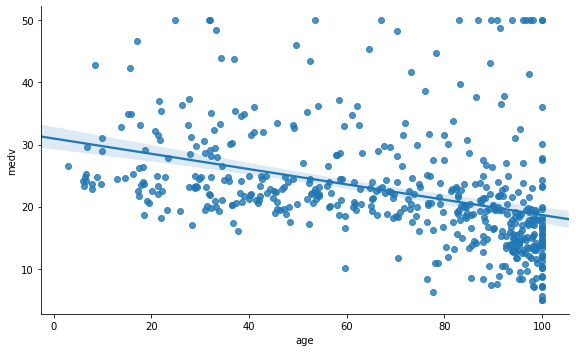

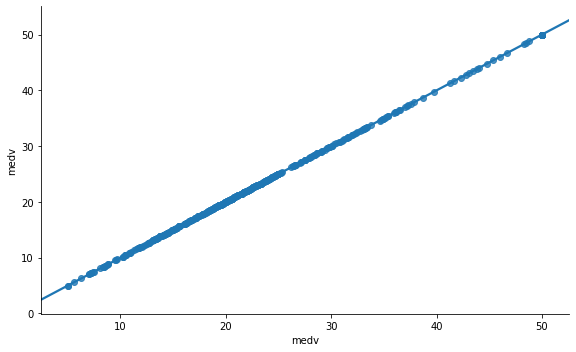

In [39]:
# Your code here 
for col in df.columns:
    sns.lmplot(x=col,y='medv',data=df,height=5,aspect=1.62 )
    
    
    plt.show();
    

In [40]:
# Your observations here 
# Crim variable's linearity seemd a bit unclear as the values are too close to each other and generally very small
# There is SOME linearity apparent in some variables although the variance along the y-axis is a bit unpredictable for some values
# Some outliers are present in almost all cases
# Data probably needs more normalization and pre-processing to "Clean it up"

Clearly, your data needs a lot of preprocessing to improve the results. This key behind a Kaggle competition is to process the data in such a way that you can identify the relationships and make predictions in the best possible way. For now, we'll use the dataset untouched and just move on with the regression. The assumptions are not _exactly_ all fulfilled, but they still hold to a level that we can move on. 

### Let's do Regression 

Now, let's perform a number of simple regression experiments between the chosen independent variables and the dependent variable (price). You'll do this in a loop and in every iteration, you should pick one of the independent variables. Perform the following steps:

* Run a simple OLS regression between independent and dependent variables
* Plot a regression line on the scatter plots
* Plot the residuals using `sm.graphics.plot_regress_exog()`
* Plot a Q-Q plot for regression residuals normality test 
* Store following values in array for each iteration:
    * Independent Variable
    * r_squared'
    * intercept'
    * 'slope'
    * 'p-value'
    * 'normality (JB)' 
* Comment on each output 

In [41]:
df.head()

,crim,dis,rm,zn,age,medv
0,0.00632,4.0900,6.575,18.0,65.2,24.0
1,0.02731,4.9671,6.421,0.0,78.9,21.6
2,0.02729,4.9671,7.185,0.0,61.1,34.7
3,0.03237,6.0622,6.998,0.0,45.8,33.4
4,0.06905,6.0622,7.147,0.0,54.2,36.2


Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~  crim
------------------------------------------------------------------------------------------


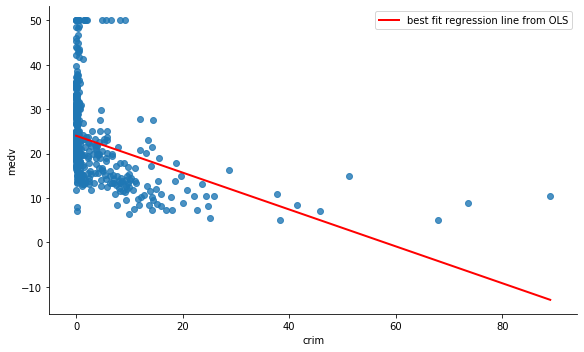

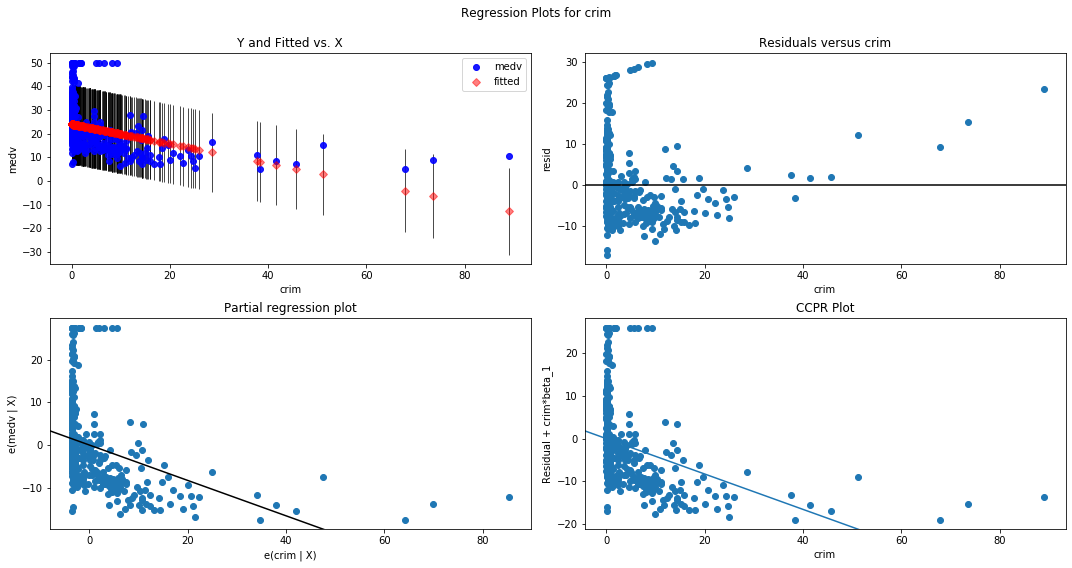

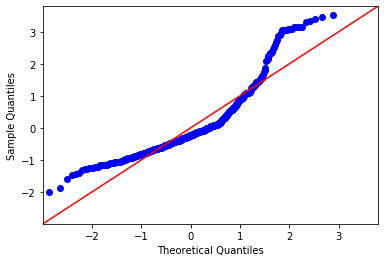

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~  dis
------------------------------------------------------------------------------------------


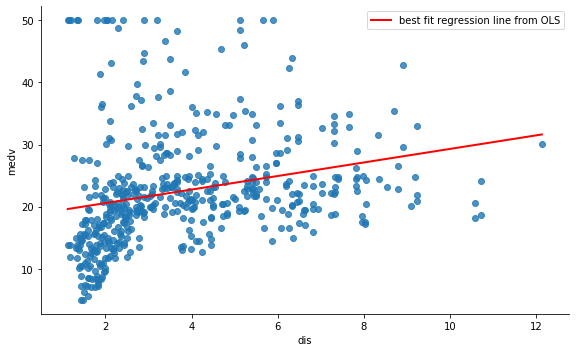

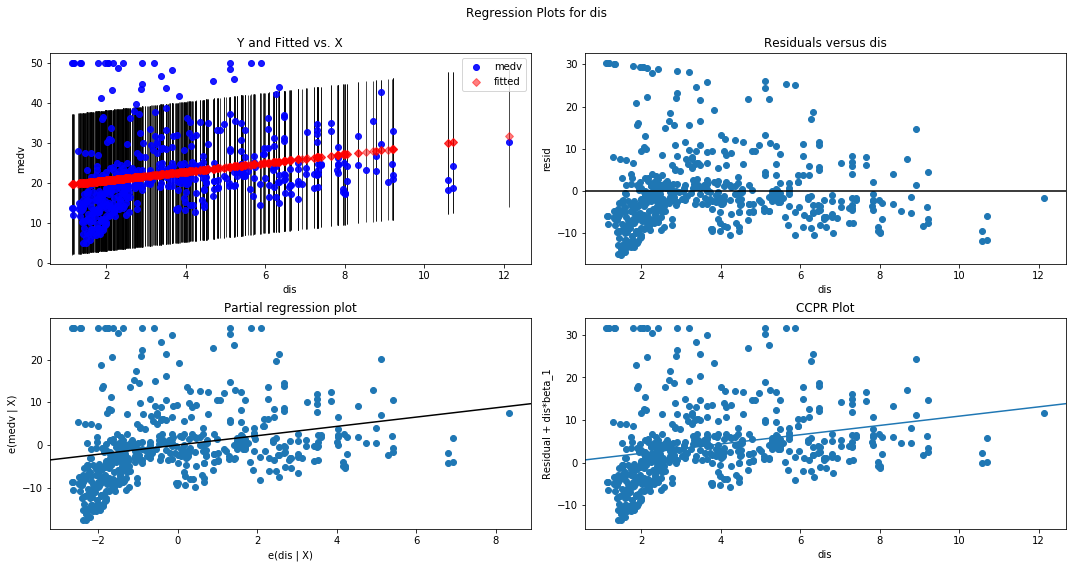

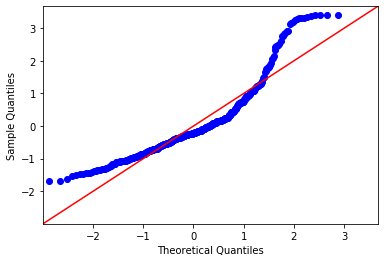

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~  rm
------------------------------------------------------------------------------------------


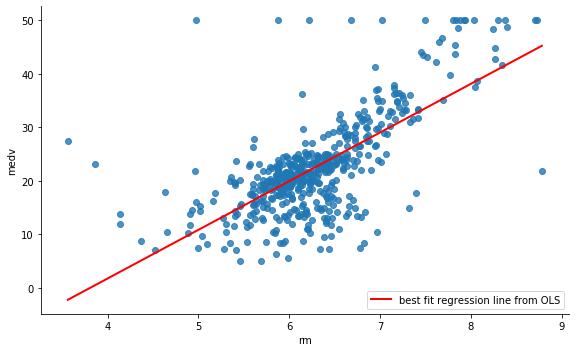

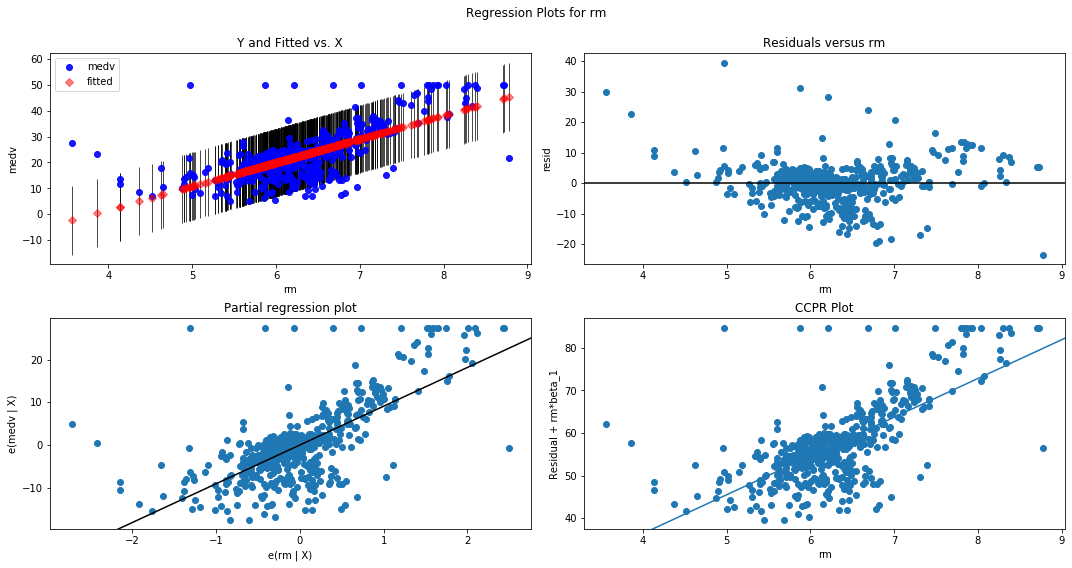

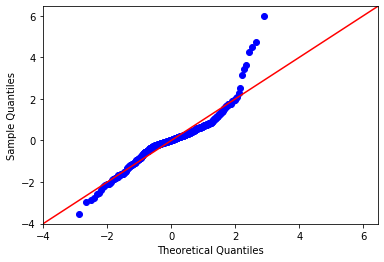

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~  zn
------------------------------------------------------------------------------------------


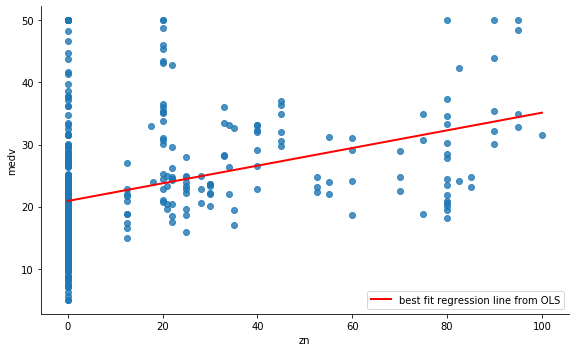

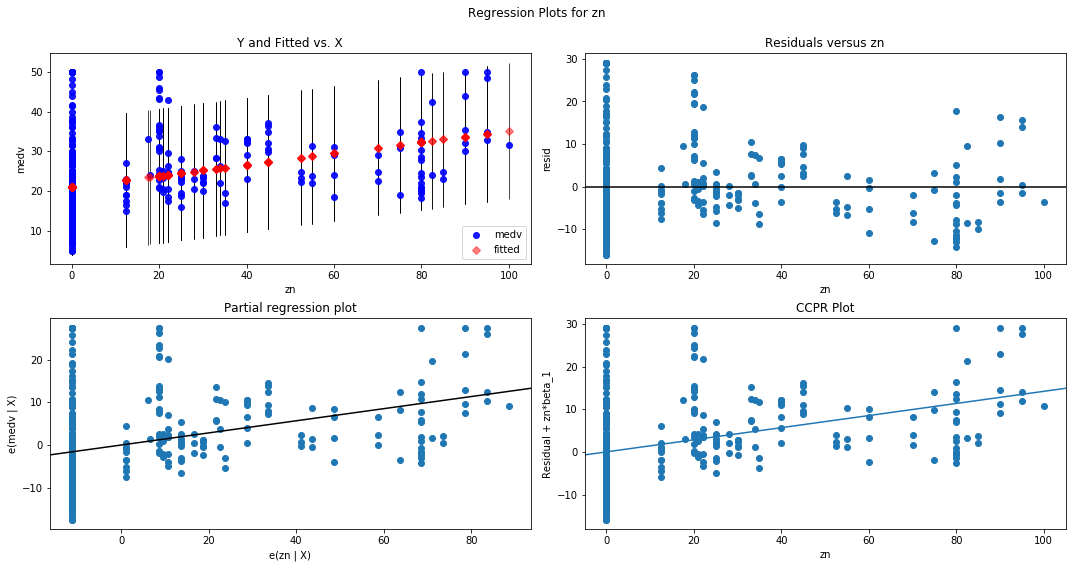

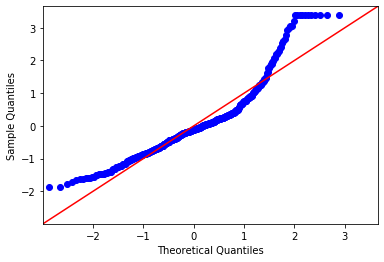

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~  age
------------------------------------------------------------------------------------------


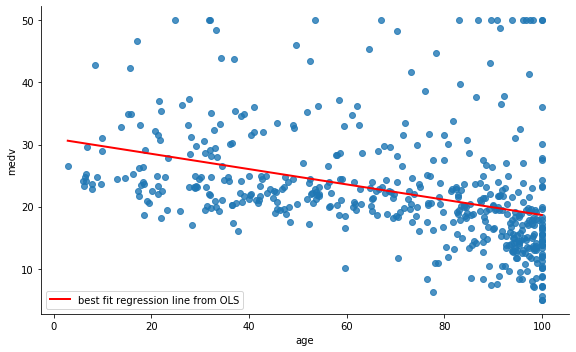

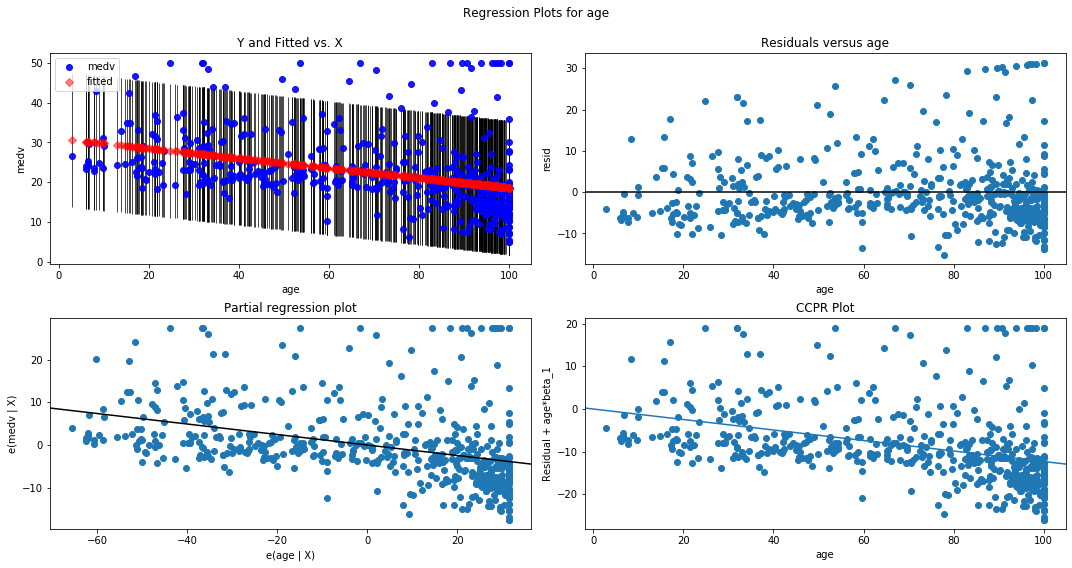

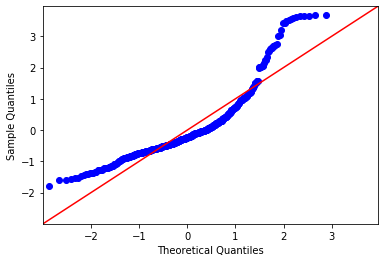

Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~  medv
------------------------------------------------------------------------------------------


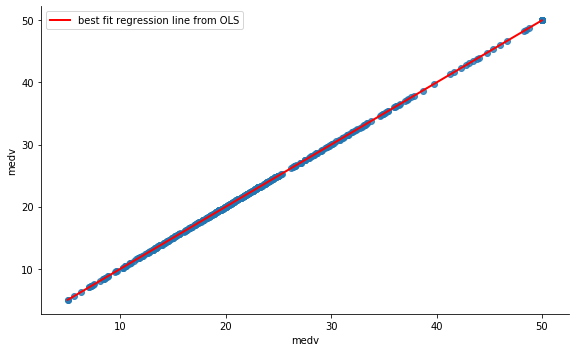

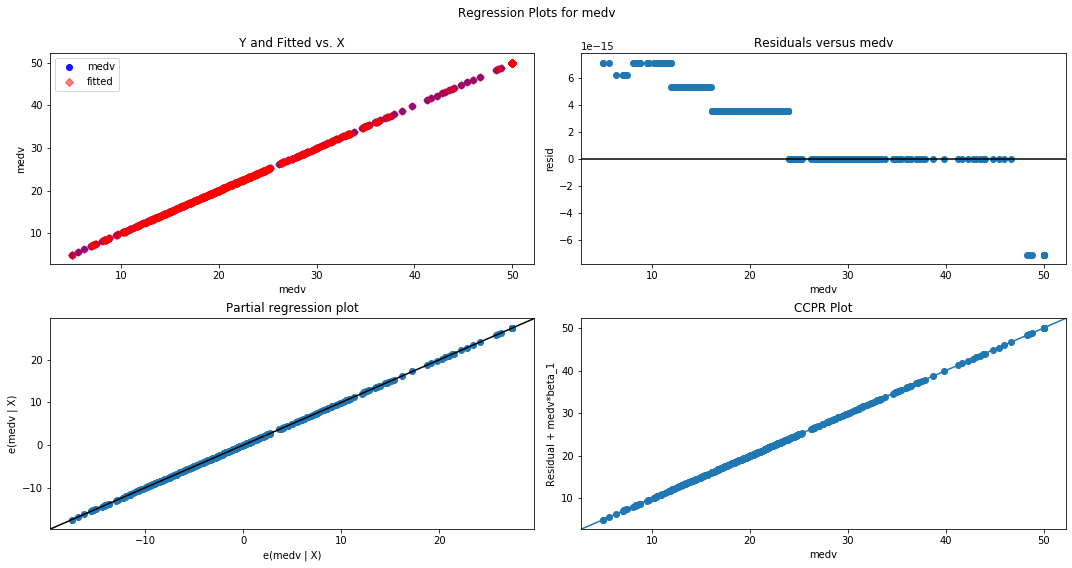

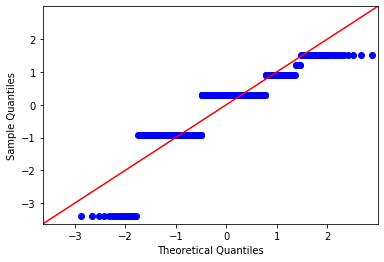

In [51]:
# Your code here

import scipy.stats as stats
import statsmodels.api as sm 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms   

results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]

for predictor in df.columns:
    print('Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~ ',predictor)
    print('------------------------------------------------------------------------------------------')
    formula='medv~'+predictor
    model = smf.ols(formula = formula, data = df).fit()

    Xnew=pd.DataFrame({predictor:[df[predictor].min(),df[predictor].max()]})

    preds=model.predict(Xnew)
    sns.lmplot(x=predictor,y='medv',data=df,fit_reg=False,height=5,aspect=1.62)
    plt.plot(Xnew,preds,c='red',linewidth=2,label='best fit regression line from OLS')
    plt.legend()
    plt.show();


    fig=plt.figure(figsize=(15,8))
    fig=sm.graphics.plot_regress_exog(model,predictor,fig=fig)
    plt.show()

    residuals=model.resid
    sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
    plt.show()

    results.append([ predictor,
                     model.rsquared, 
                     model.params[0], 
                     model.params[1], 
                     model.pvalues[1], 
                     sms.jarque_bera(model.resid)[0] ])

In [52]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,crim,0.15078,24.0331,-0.41519,1.17399e-19,295.404
2,dis,0.0624644,18.3901,1.09161,1.20661e-08,305.104
3,rm,0.483525,-34.6706,9.10211,2.48723e-74,612.449
4,zn,0.129921,20.9176,0.14214,5.71358e-17,262.387
5,age,0.142095,30.9787,-0.123163,1.56998e-18,456.983
6,medv,1,-8.10463e-15,1,0,288.493


In [118]:
#Your observations here 
# We can do a detailed analysis of each experiment and eloborate in detail 
# Here we shall show a summary of selected observations

# Crime has a negative relationship with price i.e. less crime > higher price and vice vera
# Crime does not show any clear signs heteroscedasticity 
# Crime has a low r-squared so not such a good fit 
# Residuals are not normally distributed (needs log normalization that we'll see in next section)

# A positive relationship exists between dis and medv
# dis residual plots show some signs of heteroscadasticity as cone shaped residuals
# normality is still questionable 

# rm shows a strong positive relationship
# rm residuals show no signs of heteroscdasticity however some outliers are present
# rm qqplot shows a long right tail which hurts normality 

# zn variable scatter shows a lot of variance along the y-axis and hence gives a very low r-squared value
# no clear heteroscedasticity in residuals
# normality through Q-Q plots and JB is far from perfect 

# age has a negative relatioship with prices i.e. young people > expensive houses :o
# Some obvious heteroscadasticity and normality is questionable.

Clearly, the results are not very reliable. The best R-Squared is witnessed with `rm`, so in this analysis, this is our best predictor. 

### How can you improve these results?
1. Preprocessing 

This is where the preprocessing of data comes in. Dealing with outliers, normalizing data, scaling values etc. can help regression analysis get more meaningful results from the given data. 

2. Advanced Analytical Methods

Simple regression is a very basic analysis technique and trying to fit a straight line solution to complex analytical questions may prove to be very inefficient. Later on, you'll explore multiple regression where you can use multiple features **at once** to define a relationship with the outcome. You'll also look at some preprocessing and data simplification techniques and revisit the Boston dataset with an improved toolkit. 

## Level up - Optional 

Apply some data wrangling skills that you have learned in the previous section to pre-process the set of independent variables we chose above. You can start off with outliers and think of a way to deal with them. See how it affects the goodness of fit. 

## Summary 

In this lab, you applied your skills learned so far on a new data set. You looked at the outcome of your analysis and realized that the data might need some preprocessing to see a clear improvement in the results. You'll pick this back up later on, after learning about more preprocessing techniques and advanced modeling techniques.